In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cPickle as pickle
from mpl_toolkits.mplot3d import Axes3D
import plotly.plotly as py
from plotly.graph_objs import *
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D
import math
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy as sp
from sklearn.decomposition import PCA, KernelPCA
from sklearn.decomposition import FactorAnalysis
from sklearn import preprocessing
from sklearn.mixture import GMM
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import inconsistent
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from numpy import genfromtxt
import matplotlib.patches as mpatches

pd.set_option('display.max_columns', 500)
np.set_printoptions(linewidth=5000)
np.set_printoptions(threshold=10000)
np.set_printoptions(precision=3)
%matplotlib inline

In [33]:
cost_1_1 = genfromtxt('cost_1_1.txt', delimiter=',')
cost_1_2 = genfromtxt('cost_1_2.txt', delimiter=',')
cost_2 = genfromtxt('cost_2.txt', delimiter=',')
cost_3 = genfromtxt('cost_3.txt', delimiter=',')
cost_4 = genfromtxt('cost_4.txt', delimiter=',')

weight_1_1 = genfromtxt('weight_1_1.txt', delimiter=',')
weight_1_2 = genfromtxt('weight_1_2.txt', delimiter=',')
weight_2 = genfromtxt('weight_2.txt', delimiter=',')
weight_3 = genfromtxt('weight_3.txt', delimiter=',')
weight_4 = genfromtxt('weight_4.txt', delimiter=',')

In [36]:
arr_cost_1_1= load_3d(cost_1_1,3,3,3)
arr_cost_1_2= load_3d(cost_1_2,3,3,3)
arr_cost_2= load_3d(cost_2,3,3,3)
arr_cost_3= load_3d(cost_3,3,3,3)
arr_cost_4= load_3d(cost_4,3,3,3)

arr_weight_1_1= load_3d(weight_1_1,3,3,3)
arr_weight_1_2= load_3d(weight_1_2,3,3,3)
arr_weight_2= load_3d(weight_2,3,3,3)
arr_weight_3= load_3d(weight_3,3,3,3)
arr_weight_4= load_3d(weight_4,3,3,3)

In [35]:
def load_3d(arr,x=0,y=0,z=0):
    a = np.zeros(shape=(x,y,z))
    #print(a.shape)
    meow = 0
    for i in range(0,x):
        for j in range(0,y):
            for k in range(0,z):
                if k>=0 and j>=0 :
                    a[i,j,k] = arr[meow]
                else:
                    a[i,j] = arr[meow]
                meow += 1
    return a  

In [40]:
def make_labels(a,b,c):
    arr = []
    for i in range(1,a+1):
        for j in range(1,b+1):
            for k in range(1,c+1):
                arr.append("("+str(i)+","+str(j)+","+str(k)+")")
    return arr

In [42]:
dr_labels = make_labels(3,3,3)

In [37]:
def basicBarPlot(title, values, x_tick_labels, x_label, y_label, x_label_rotation, y_tick_labels =None, label=None, x_grid=False, y_grid=False, color_bar='m', xlim=None, ylim=None, file_name=None, bar_width=None):
        """
        title: Plot title
        values: Values to plot (frequencies)
        label: Legend
        x_labels: Name of each bar
        y_label: Label of y axis
        x_label_rotation: angle of rotation of the x_labels
        color_bar: color
        xlim: x axis limit
        ylim: y axis limit
        file_name: filename to store the plot
        """
        if(len(values) != len(x_tick_labels)):
            print ("Lenght of data does not match length of labels given!!")
        else:
            plt.figure(figsize=(5,5))
            fig, ax = plt.subplots()
            fig.canvas.set_window_title(title)
            pos = np.arange(len(x_tick_labels)) + 0.5
            ax.yaxis.grid(y_grid, linestyle='--', which='major',
                               color='grey', alpha=.25)
            ax.xaxis.grid(x_grid, linestyle='--', which='major',
                               color='grey', alpha=.25)
            pos = np.arange(len(x_tick_labels)) + 0.5
            if(bar_width!=None):
                ax.bar(pos, values, align='center', color=color_bar, label=label, width=bar_width)
            else:
                ax.bar(pos, values, align='center', color=color_bar, label=label)
            x_tick_pos = np.arange(0.5,len(values) + 0.5,1)
            x_tick_pos
            # Modify position of xticklabels
            ax.set_xticks(x_tick_pos)
            ax.set_xticklabels( x_tick_labels, rotation = x_label_rotation)
            ax.set_ylabel(y_label)
            ax.set_xlabel(x_label)
            
            if(y_tick_labels != None):
                y_tick_pos = np.arange(1,len(y_tick_labels) ,1)
                ax.set_yticks(y_tick_pos)
                ax.set_yticklabels(y_tick_labels)

            # xlim and ylim are lists
            if(xlim!=None):
                ax.set_xlim(xlim)
            if(ylim!=None):
                ax.set_ylim(ylim)

            plt.legend( loc='best', numpoints = 1 )

            # save file if name given as eps
            if(file_name != None):
                plt.savefig(file_name, format='pdf', dpi=1000,bbox_inches='tight')

            plt.show()

3.7037037037


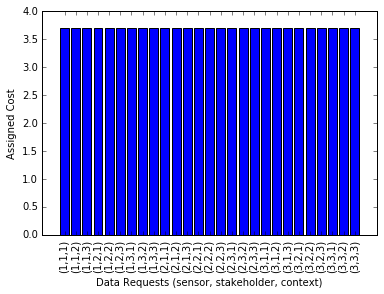

In [73]:
# plot cost versus data requests
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()
# customized colors
average = np.average(cost_1_1[0:27])
print(average)
col = []
for i in range(0,27):
    if cost_1_1[i] == average:
        col.append('mediumblue')
    if cost_1_1[i] > average:
        col.append('darkblue')
    if cost_1_1[i] < average:
        col.append('blue')
        
ax.bar(range(2,29), cost_1_1[0:27], align='center', color=col)
ax.set_xticks(range(2,29))
ax.set_xticklabels( dr_labels, rotation = 90)
ax.set_ylabel("Assigned Costs")
ax.set_xlabel("Data Requests (sensor, stakeholder, context)")
plt.savefig("trial", format='pdf', dpi=300, bbox_inches='tight')

0.6


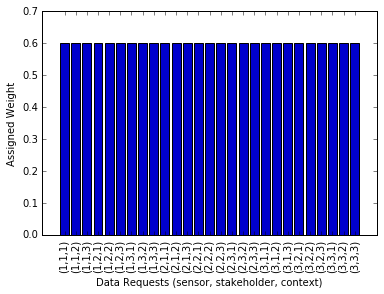

In [71]:
# plot cost versus data requests
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()

# customized colors
average = np.average(weight_1_1[0:27])
print(average)
col = []
for i in range(0,27):
    if weight_1_1[i] == average:
        col.append('mediumblue')
    if weight_1_1[i] > average:
        col.append('darkblue')
    if weight_1_1[i] < average:
        col.append('blue')

    
ax.bar(range(2,29), weight_1_1[0:27], align='center', color=col)
ax.set_xticks(range(2,29))
ax.set_xticklabels( dr_labels, rotation = 90)
ax.set_ylabel("Assigned Weights")
ax.set_xlabel("Data Requests (sensor, stakeholder, context)")
plt.savefig("trial", format='pdf', dpi=300, bbox_inches='tight')

0.2


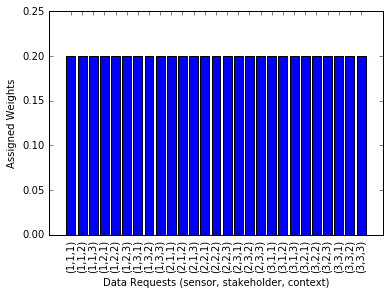

In [77]:
# plot cost versus data requests
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()

meek = weight_1_2[0:27]

# customized colors
average = np.average(meek)
print(average)
col = []
for i in range(0,len(meek)):
    if meek[i] == average:
        col.append('mediumblue')
    if meek[i] > average:
        col.append('darkblue')
    if meek[i] < average:
        col.append('blue')

    
ax.bar(range(2,29), meek, align='center', color=col)
ax.set_xticks(range(2,29))
ax.set_xticklabels( dr_labels, rotation = 90)
ax.set_ylabel("Assigned Weights")
ax.set_xlabel("Data Requests (sensor, stakeholder, context)")
plt.savefig("trial", format='pdf', dpi=300, bbox_inches='tight')

3.7037037037


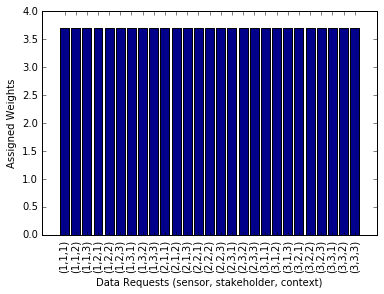

In [78]:
# plot cost versus data requests
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()

meek = cost_1_2[0:27]

# customized colors
average = np.average(meek)
print(average)
col = []
for i in range(0,len(meek)):
    if meek[i] == average:
        col.append('mediumblue')
    if meek[i] > average:
        col.append('darkblue')
    if meek[i] < average:
        col.append('blue')

    
ax.bar(range(2,29), meek, align='center', color=col)
ax.set_xticks(range(2,29))
ax.set_xticklabels( dr_labels, rotation = 90)
ax.set_ylabel("Assigned Weights")
ax.set_xlabel("Data Requests (sensor, stakeholder, context)")
plt.savefig("trial", format='pdf', dpi=300, bbox_inches='tight')

0.6


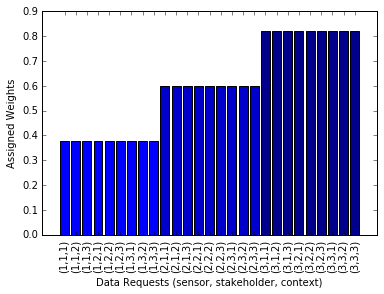

In [102]:
# plot cost versus data requests
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()

meek = weight_2[0:27]

# customized colors
average = np.average(meek)
print(average)
col = []
for i in range(0,len(meek)):
    if meek[i] == average:
        col.append('mediumblue')
    elif meek[i] > average:
        col.append('darkblue')
    elif meek[i] < average:
        col.append('blue')

    
ax.bar(range(2,29), meek, align='center', color=col)
ax.set_xticks(range(2,29))
ax.set_xticklabels( dr_labels, rotation = 90)
ax.set_ylabel("Assigned Weights")
ax.set_xlabel("Data Requests (sensor, stakeholder, context)")
plt.savefig("trial", format='pdf', dpi=300, bbox_inches='tight')

3.7037037037


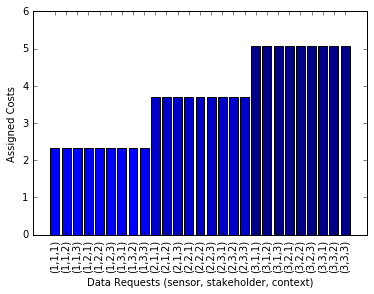

In [98]:
# plot cost versus data requests
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()

meek = cost_2[0:27]

# customized colors
average = np.average(meek)
print(average)
col = []
for i in range(0,len(meek)):
    
    if meek[i] > average:
        col.append('darkblue')
    elif meek[i] > average-0.5 and meek[i] < average+0.5:
        col.append('mediumblue')
    elif meek[i] < average:
        col.append('blue')

    
ax.bar(range(2,29), meek, align='center', color=col)
ax.set_xticks(range(2,29))
ax.set_xticklabels( dr_labels, rotation = 90)
ax.set_ylabel("Assigned Costs")
ax.set_xlabel("Data Requests (sensor, stakeholder, context)")
plt.savefig("trial", format='pdf', dpi=300, bbox_inches='tight')

3.7037037037


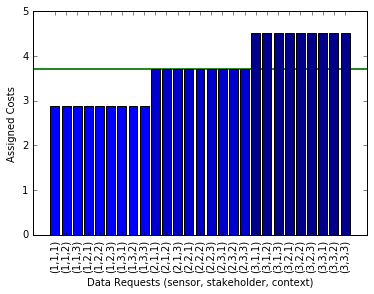

In [132]:
# plot cost versus data requests
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()

meek = cost_3[0:27]

# customized colors
average = np.average(meek)
print(average)
col = []
for i in range(0,len(meek)):
    if meek[i] > average-0.2 and meek[i] < average+0.2:
        col.append('mediumblue')
    elif meek[i] > average:
        col.append('darkblue')
    elif meek[i] < average:
        col.append('blue')

ax.axhline(y=average, linewidth=2, color='ForestGreen', zorder=0)    
ax.bar(range(2,29), meek, align='center', color=col)
ax.set_xticks(range(2,29))
ax.set_xticklabels( dr_labels, rotation = 90)
ax.set_ylabel("Assigned Costs")
ax.set_xlabel("Data Requests (sensor, stakeholder, context)")
plt.savefig("trial", format='pdf', dpi=300, bbox_inches='tight')

0.6


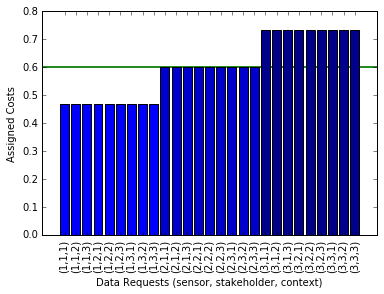

In [131]:
# plot cost versus data requests
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()

meek = weight_3[0:27]

# customized colors
average = np.average(meek)
print(average)
col = []
for i in range(0,len(meek)):
    
    if meek[i] > average:
        col.append('darkblue')
    elif meek[i] == average :
        col.append('mediumblue')
    elif meek[i] < average:
        col.append('blue')

ax.axhline(y=average, linewidth=2, color='ForestGreen', zorder=0)     
ax.bar(range(2,29), meek, align='center', color=col)
ax.set_xticks(range(2,29))
ax.set_xticklabels( dr_labels, rotation = 90)
ax.set_ylabel("Assigned Costs")
ax.set_xlabel("Data Requests (sensor, stakeholder, context)")
plt.savefig("trial", format='pdf', dpi=300, bbox_inches='tight')

0.466666666667


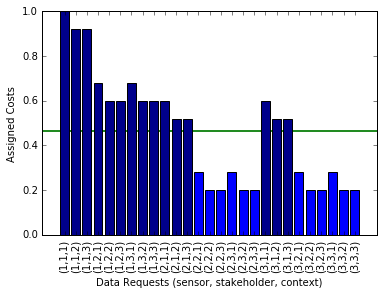

In [133]:
# plot cost versus data requests
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()

meek = weight_4[0:27]

# customized colors
average = np.average(meek)
print(average)
col = []
for i in range(0,len(meek)):
    if meek[i] ==average :
        col.append('mediumblue')
    elif meek[i] > average:
        col.append('darkblue')
    elif meek[i] < average:
        col.append('blue')
        
plt.legend( loc='best', numpoints = 1 )

ax.axhline(y=average, linewidth=2, color='ForestGreen', zorder=0)     
ax.bar(range(2,29), meek, align='center', color=col)
ax.set_xticks(range(2,29))
ax.set_xticklabels( dr_labels, rotation = 90)
ax.set_ylabel("Assigned Costs")
ax.set_xlabel("Data Requests (sensor, stakeholder, context)")
plt.savefig("trial", format='pdf', dpi=300, bbox_inches='tight')

average = 3.7037037037


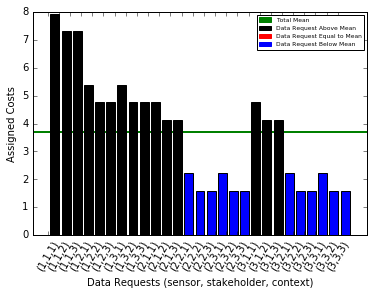

In [218]:
# plot cost versus data requests
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()

meek = cost_4[0:27]

# customized colors
average = np.average(meek)
print("average = "+str(average))
col = []
label = []
for i in range(0,len(meek)):
    if meek[i] == average :
        col.append('r')
        label.append('')
    elif meek[i] > average:
        col.append('k')
        label.append('r')
    elif meek[i] < average:
        col.append('b')
        label.append('Below Mean')

xx = range(2,29)
xx1 = []
xx1[:] = [x-0.65 for x in xx]

ax.axhline(y=average, linewidth=2, color='g', zorder=0)  
ax.bar(xx, meek, align='center', color=col)
ax.set_xticks(xx1)
ax.set_xticklabels(dr_labels, rotation = 60)
ax.set_ylabel("Assigned Costs")
ax.set_xlabel("Data Requests (sensor, stakeholder, context)")
mean = mpatches.Patch(color='g', label='Total Mean')
am = mpatches.Patch(color='k', label='Data Request Above Mean')
em = mpatches.Patch(color='r', label='Data Request Equal to Mean')
bm = mpatches.Patch(color='b', label='Data Request Below Mean')
ax.legend(handles=[mean,am,em,bm], loc='best',prop={'size':6})
plt.savefig("cost_4", format='pdf', dpi=300, bbox_inches='tight')

average = 0.466666666667


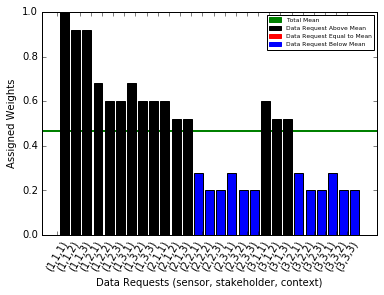

In [214]:
# plot cost versus data requests
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()

meek = weight_4[0:27]

# customized colors
average = np.average(meek)
print("average = "+str(average))
col = []
label = []
for i in range(0,len(meek)):
    if meek[i] == average :
        col.append('r')
        label.append('')
    elif meek[i] > average:
        col.append('k')
        label.append('r')
    elif meek[i] < average:
        col.append('b')
        label.append('Below Mean')

xx = range(2,29)
xx1 = []
xx1[:] = [x-0.65 for x in xx]

ax.axhline(y=average, linewidth=2, color='g', zorder=0)  
ax.bar(xx, meek, align='center', color=col)
ax.set_xticks(xx1)
ax.set_xticklabels(dr_labels, rotation = 60)
ax.set_ylabel("Assigned Weights")
ax.set_xlabel("Data Requests (sensor, stakeholder, context)")
mean = mpatches.Patch(color='g', label='Total Mean')
am = mpatches.Patch(color='k', label='Data Request Above Mean')
em = mpatches.Patch(color='r', label='Data Request Equal to Mean')
bm = mpatches.Patch(color='b', label='Data Request Below Mean')
ax.legend(handles=[mean,am,em,bm], loc='best',prop={'size':6})
plt.savefig("weight_4", format='pdf', dpi=300, bbox_inches='tight')

average = 0.6


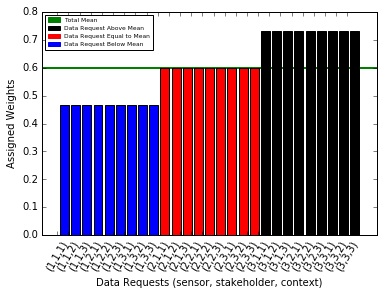

In [213]:
# plot cost versus data requests
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()

meek = weight_3[0:27]

# customized colors
average = np.average(meek)
print("average = "+str(average))
col = []
label = []
for i in range(0,len(meek)):
    if meek[i] == average :
        col.append('r')
        label.append('')
    elif meek[i] > average:
        col.append('k')
        label.append('r')
    elif meek[i] < average:
        col.append('b')
        label.append('Below Mean')

xx = range(2,29)
xx1 = []
xx1[:] = [x-0.65 for x in xx]

ax.axhline(y=average, linewidth=2, color='g', zorder=0)  
ax.bar(xx, meek, align='center', color=col)
ax.set_xticks(xx1)
ax.set_xticklabels(dr_labels, rotation = 60)
ax.set_ylabel("Assigned Weights")
ax.set_xlabel("Data Requests (sensor, stakeholder, context)")
mean = mpatches.Patch(color='g', label='Total Mean')
am = mpatches.Patch(color='k', label='Data Request Above Mean')
em = mpatches.Patch(color='r', label='Data Request Equal to Mean')
bm = mpatches.Patch(color='b', label='Data Request Below Mean')
ax.legend(handles=[mean,am,em,bm], loc='best',prop={'size':6})
plt.savefig("weight_3", format='pdf', dpi=300, bbox_inches='tight')

average = 0.6


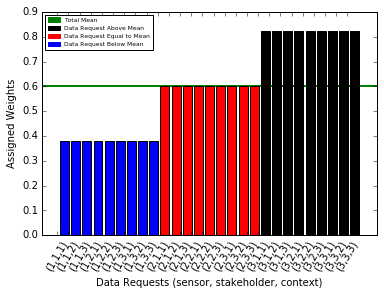

In [212]:
# plot cost versus data requests
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()

meek = weight_2[0:27]

# customized colors
average = np.average(meek)
print("average = "+str(average))
col = []
label = []
for i in range(0,len(meek)):
    if meek[i] == average :
        col.append('r')
        label.append('')
    elif meek[i] > average:
        col.append('k')
        label.append('r')
    elif meek[i] < average:
        col.append('b')
        label.append('Below Mean')

xx = range(2,29)
xx1 = []
xx1[:] = [x-0.65 for x in xx]

ax.axhline(y=average, linewidth=2, color='g', zorder=0)  
ax.bar(xx, meek, align='center', color=col)
ax.set_xticks(xx1)
ax.set_xticklabels(dr_labels, rotation = 60)
ax.set_ylabel("Assigned Weights")
ax.set_xlabel("Data Requests (sensor, stakeholder, context)")
mean = mpatches.Patch(color='g', label='Total Mean')
am = mpatches.Patch(color='k', label='Data Request Above Mean')
em = mpatches.Patch(color='r', label='Data Request Equal to Mean')
bm = mpatches.Patch(color='b', label='Data Request Below Mean')
ax.legend(handles=[mean,am,em,bm], loc='best',prop={'size':6})
plt.savefig("weight_2", format='pdf', dpi=300, bbox_inches='tight')

average = 0.6


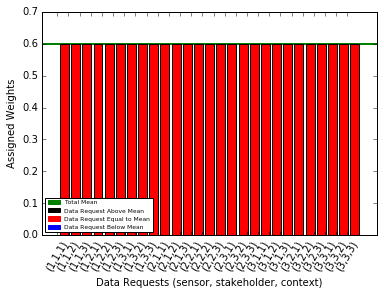

In [211]:
# plot cost versus data requests
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()

meek = weight_1_1[0:27]

# customized colors
average = np.average(meek)
print("average = "+str(average))
col = []
label = []
for i in range(0,len(meek)):
    if meek[i] == average :
        col.append('r')
        label.append('')
    elif meek[i] > average:
        col.append('k')
        label.append('r')
    elif meek[i] < average:
        col.append('b')
        label.append('Below Mean')

xx = range(2,29)
xx1 = []
xx1[:] = [x-0.65 for x in xx]

ax.axhline(y=average, linewidth=2, color='g', zorder=0)  
ax.bar(xx, meek, align='center', color=col)
ax.set_xticks(xx1)
ax.set_xticklabels(dr_labels, rotation = 60)
ax.set_ylabel("Assigned Weights")
ax.set_xlabel("Data Requests (sensor, stakeholder, context)")
mean = mpatches.Patch(color='g', label='Total Mean')
am = mpatches.Patch(color='k', label='Data Request Above Mean')
em = mpatches.Patch(color='r', label='Data Request Equal to Mean')
bm = mpatches.Patch(color='b', label='Data Request Below Mean')
ax.legend(handles=[mean,am,em,bm], loc='best',prop={'size':6})
plt.savefig("weight_1_1", format='pdf', dpi=300, bbox_inches='tight')

average = 0.2


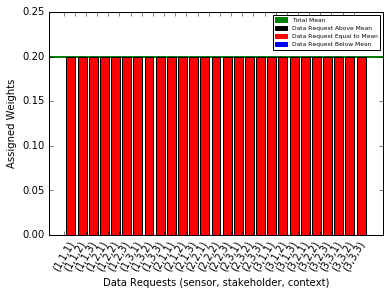

In [210]:
# plot cost versus data requests
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()

meek = weight_1_2[0:27]

# customized colors
average = np.average(meek)
print("average = "+str(average))
col = []
label = []
for i in range(0,len(meek)):
    if meek[i] == average :
        col.append('r')
        label.append('')
    elif meek[i] > average:
        col.append('k')
        label.append('r')
    elif meek[i] < average:
        col.append('r')
        label.append('Below Mean')

xx = range(2,29)
xx1 = []
xx1[:] = [x-0.65 for x in xx]

ax.axhline(y=average, linewidth=2, color='g', zorder=0)  
ax.bar(xx, meek, align='center', color=col)
ax.set_xticks(xx1)
ax.set_xticklabels(dr_labels, rotation = 60)
ax.set_ylabel("Assigned Weights")
ax.set_xlabel("Data Requests (sensor, stakeholder, context)")
mean = mpatches.Patch(color='g', label='Total Mean')
am = mpatches.Patch(color='k', label='Data Request Above Mean')
em = mpatches.Patch(color='r', label='Data Request Equal to Mean')
bm = mpatches.Patch(color='b', label='Data Request Below Mean')
ax.legend(handles=[mean,am,em,bm], loc='best',prop={'size':6})
plt.savefig("weight_1_2", format='pdf', dpi=300, bbox_inches='tight')

average = 3.7037037037


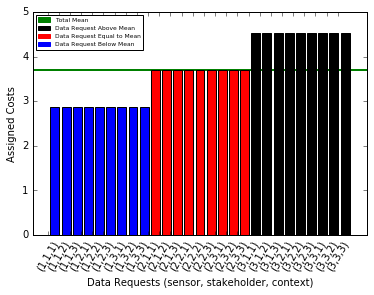

In [221]:
# plot cost versus data requests
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()

meek = cost_3[0:27]

# customized colors
average = np.average(meek)
print("average = "+str(average))
col = []
label = []
for i in range(0,len(meek)):
    if meek[i] > average-0.2 and meek[i] < average+0.2 :
        col.append('r')
        label.append('')
    elif meek[i] > average:
        col.append('k')
        label.append('r')
    elif meek[i] < average:
        col.append('b')
        label.append('Below Mean')

xx = range(2,29)
xx1 = []
xx1[:] = [x-0.65 for x in xx]

ax.axhline(y=average, linewidth=2, color='g', zorder=0)  
ax.bar(xx, meek, align='center', color=col)
ax.set_xticks(xx1)
ax.set_xticklabels(dr_labels, rotation = 60)
ax.set_ylabel("Assigned Costs")
ax.set_xlabel("Data Requests (sensor, stakeholder, context)")
mean = mpatches.Patch(color='g', label='Total Mean')
am = mpatches.Patch(color='k', label='Data Request Above Mean')
em = mpatches.Patch(color='r', label='Data Request Equal to Mean')
bm = mpatches.Patch(color='b', label='Data Request Below Mean')
ax.legend(handles=[mean,am,em,bm], loc='best',prop={'size':6})
plt.savefig("cost_3", format='pdf', dpi=300, bbox_inches='tight')

average = 3.7037037037


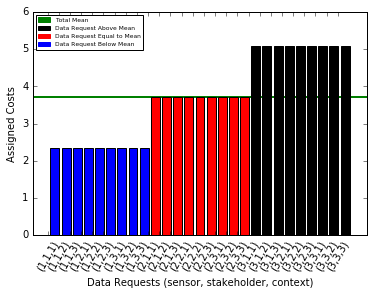

In [220]:
# plot cost versus data requests
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()

meek = cost_2[0:27]

# customized colors
average = np.average(meek)
print("average = "+str(average))
col = []
label = []
for i in range(0,len(meek)):
    if meek[i] > average-0.2 and meek[i] < average+0.2:
        col.append('r')
        label.append('')
    elif meek[i] > average:
        col.append('k')
        label.append('r')
    elif meek[i] < average:
        col.append('b')
        label.append('Below Mean')

xx = range(2,29)
xx1 = []
xx1[:] = [x-0.65 for x in xx]

ax.axhline(y=average, linewidth=2, color='g', zorder=0)  
ax.bar(xx, meek, align='center', color=col)
ax.set_xticks(xx1)
ax.set_xticklabels(dr_labels, rotation = 60)
ax.set_ylabel("Assigned Costs")
ax.set_xlabel("Data Requests (sensor, stakeholder, context)")
mean = mpatches.Patch(color='g', label='Total Mean')
am = mpatches.Patch(color='k', label='Data Request Above Mean')
em = mpatches.Patch(color='r', label='Data Request Equal to Mean')
bm = mpatches.Patch(color='b', label='Data Request Below Mean')
ax.legend(handles=[mean,am,em,bm], loc='best',prop={'size':6})
plt.savefig("cost_2", format='pdf', dpi=300, bbox_inches='tight')

average = 3.7037037037


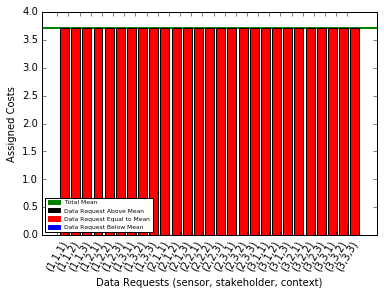

In [222]:
# plot cost versus data requests
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()

meek = cost_1_1[0:27]

# customized colors
average = np.average(meek)
print("average = "+str(average))
col = []
label = []
for i in range(0,len(meek)):
    if meek[i] > average-0.2 and meek[i] < average+0.2:
        col.append('r')
        label.append('')
    elif meek[i] > average:
        col.append('k')
        label.append('r')
    elif meek[i] < average:
        col.append('b')
        label.append('Below Mean')

xx = range(2,29)
xx1 = []
xx1[:] = [x-0.65 for x in xx]

ax.axhline(y=average, linewidth=2, color='g', zorder=0)  
ax.bar(xx, meek, align='center', color=col)
ax.set_xticks(xx1)
ax.set_xticklabels(dr_labels, rotation = 60)
ax.set_ylabel("Assigned Costs")
ax.set_xlabel("Data Requests (sensor, stakeholder, context)")
mean = mpatches.Patch(color='g', label='Total Mean')
am = mpatches.Patch(color='k', label='Data Request Above Mean')
em = mpatches.Patch(color='r', label='Data Request Equal to Mean')
bm = mpatches.Patch(color='b', label='Data Request Below Mean')
ax.legend(handles=[mean,am,em,bm], loc='best',prop={'size':6})
plt.savefig("cost_1_1", format='pdf', dpi=300, bbox_inches='tight')

average = 3.7037037037


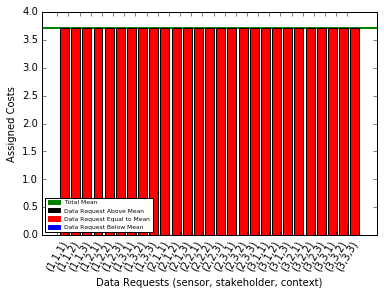

In [225]:
# plot cost versus data requests
plt.figure(figsize=(5,5))
fig, ax = plt.subplots()

meek = cost_1_2[0:27]

# customized colors
average = np.average(meek)
print("average = "+str(average))
col = []
label = []
for i in range(0,len(meek)):
    if meek[i] > average-0.2 and meek[i] < average+0.2:
        col.append('r')
        label.append('')
    elif meek[i] > average:
        col.append('k')
        label.append('r')
    elif meek[i] < average:
        col.append('b')
        label.append('Below Mean')

xx = range(2,29)
xx1 = []
xx1[:] = [x-0.65 for x in xx]

ax.axhline(y=average, linewidth=2, color='g', zorder=0)  
ax.bar(xx, meek, align='center', color=col)
ax.set_xticks(xx1)
ax.set_xticklabels(dr_labels, rotation = 60)
ax.set_ylabel("Assigned Costs")
ax.set_xlabel("Data Requests (sensor, stakeholder, context)")
mean = mpatches.Patch(color='g', label='Total Mean')
am = mpatches.Patch(color='k', label='Data Request Above Mean')
em = mpatches.Patch(color='r', label='Data Request Equal to Mean')
bm = mpatches.Patch(color='b', label='Data Request Below Mean')
ax.legend(handles=[mean,am,em,bm], loc='best',prop={'size':6})
plt.savefig("cost_1_2", format='pdf', dpi=300, bbox_inches='tight')

average = 3.7037037037
average = 0.2


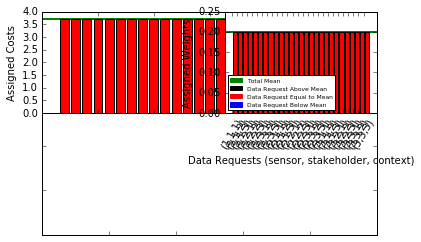

In [246]:
# plot cost versus data requests
plt.figure(figsize=(10,10))
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(222)

ax1.set_xticklabels([])
ax1.set_yticklabels([])

meek = cost_1_2[0:27]

# customized colors
average = np.average(meek)
print("average = "+str(average))
col = []
label = []
for i in range(0,len(meek)):
    if meek[i] > average-0.2 and meek[i] < average+0.2:
        col.append('r')
        label.append('')
    elif meek[i] > average:
        col.append('k')
        label.append('r')
    elif meek[i] < average:
        col.append('b')
        label.append('Below Mean')

xx = range(2,29)
xx1 = []
xx1[:] = [x-0.65 for x in xx]

ax.axhline(y=average, linewidth=2, color='g', zorder=0)  
ax.bar(xx, meek, align='center', color=col)
ax.set_ylabel("Assigned Costs")
ax.set_xticklabels([])

meek = weight_1_2[0:27]

# customized colors
average = np.average(meek)
print("average = "+str(average))
col = []
label = []
for i in range(0,len(meek)):
    if meek[i] == average :
        col.append('r')
        label.append('')
    elif meek[i] > average:
        col.append('k')
        label.append('r')
    elif meek[i] < average:
        col.append('r')
        label.append('Below Mean')

xx = range(2,29)
xx1 = []
xx1[:] = [x-0.65 for x in xx]

ax2.axhline(y=average, linewidth=2, color='g', zorder=0)  
ax2.bar(xx, meek, align='center', color=col)
ax2.set_xticks(xx1)
ax2.set_xticklabels(dr_labels, rotation = 60)
ax2.set_ylabel("Assigned Weights")
ax2.set_xlabel("Data Requests (sensor, stakeholder, context)")
mean = mpatches.Patch(color='g', label='Total Mean')
am = mpatches.Patch(color='k', label='Data Request Above Mean')
em = mpatches.Patch(color='r', label='Data Request Equal to Mean')
bm = mpatches.Patch(color='b', label='Data Request Below Mean')
plt.legend(handles=[mean,am,em,bm], loc='best',prop={'size':6})
plt.savefig("weight_1_2", format='pdf', dpi=300, bbox_inches='tight')